# Topic Modelling with LDA & LSA approach with Criminalitas in indonesia


## Import library

In [ ]:
!pip install arxiv pyLDAvis unidecode gensim sastrawi

In [ ]:
!pip uninstall numpy

In [ ]:
!pip install numpy

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

In [ ]:
import arxiv
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import nltk
from typing import List
from wordcloud import WordCloud
from gensim import models, corpora
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from nltk.corpus import stopwords
nltk.download('punkt')
# nltk.download('stopwords')


## Load dataset

In [ ]:
import pandas as pd
data = pd.read_excel('kejahatanRiset-noDuplicat.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title  \
0     polisi sebut oknum anggota polri ditetapkan te...   
1     3 fakta pasukan brimob dikirim ke yapen kkb te...   
2     menilik peran satgas tppo efektifkah tangani p...   
3                      antikorupsi melampaui politisasi   
4     dukung langkah kabareskrim cegah narkopolitik ...   
...                                                 ...   
1391  serangan rusia ke kyiv tewaskan 3 orang termas...   
1392  ngaku polisi wasta rampas hp tiga pelajar  rad...   
1393  ibu dan anak perempuannya jadi korban rudal ru...   
1394  program amnesti sawit ilegal sarat kritik seja...   
1395  polrestabes medan tangkap 10 kawanan geng moto...   

                                                   body  
0     ilustrasi tersangka kasus persetubuhan anak di...  
1     jayapura  pasukan brimob dikirim ke wilayah ka...  
2     tirtoid  presiden joko widodo dalam rapat inte...  
3     kontancoid  jakarta kejaksaan agung menetapkan...  
4     rmol  ketua indonesia police watch ipw sugeng ...  
...                                                 ...  
1391  reuters melaporkan angkatan udara au ukraina m...  
1392  radar jogja  wasta setiaji 42 harus berurusan ...  
1393  iklan  tempoco jakarta  seorang bocah perempua...  
1394  para aktivis memperingatkan muncul potensi pen...  
1395  medan waspadacoid  tim anti begal sat reskrim ...  

[1396 rows x 2 columns]

## Stopword and Stemming

In [ ]:
# Initialize the stopword remover and stemmer
stopword_remover_factory = StopWordRemoverFactory()
stopword_remover = stopword_remover_factory.create_stop_word_remover()

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Define a function to remove stopwords and perform stemming
def preprocess_text(text):
    # Remove stopwords
    text = stopword_remover.remove(text)
    # Perform stemming
    text = stemmer.stem(text)
    return text

# Apply the preprocessing function to the 'body' column
data['cleaned_body'] = data['body'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['cleaned_body'].values[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['ilustrasi sangka kasus tubuh anak bawah umur tiba mapolda sulteng rabu 315 kristina nataliaantara jawaposcomanggota dpd ri minta kapolri kapolda sulteng segera tindak tegas oknum anggota polri duga laku tindak asusila anak bawah umur tindak rusak citra polisi mata rakyat tolerir juga minta sidi transparan buka pandang bulu siapa tindak tidak ada boleh lepas jerat hukum korban bawah umur laku aparat harus lindung ayom masyarakat tegas abdul rachman thaha minta pimpin polri laku evaluasi pola rekrutmen bina awas jadi sebut tidak terus ulang dia proses rekrutmen baik hasil polisi baik kredibel psikologis intelektual semua baik ingin polisi milik mampu ungkap tangkap laku jahat polisi lindung ayom ucap abdul rachman thaha kasus harus tuntas beri rasa adil aman masyarakat taruh polri baik diri harap kapolri beri atensi kasus ucap abdul rachman thaha itu kepala polisi daerah kapolda sulawesi tengah irjen pol agus nugroho sebut tetap mks rupa oknum anggota polri sangka kasus tubuh ana

## Exploratory Data Analysis

Topic Visualisation In dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


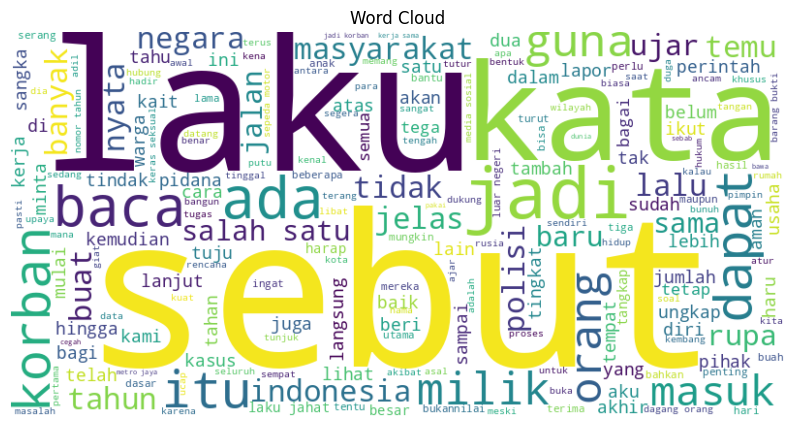

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable called 'data'
df = pd.DataFrame(data)

# Concatenate all the text from the 'cleaned_body' column
all_text = ' '.join(df['cleaned_body'].astype(str))

# Generate the word frequency analysis
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

## Making corpus

In [ ]:
# making among sentences --> words
article_summaries = data['cleaned_body'].values
article_summaries = [[word for word in nltk.word_tokenize(article)] for article in article_summaries]

# create a dictionary of all the words in the dataset
dictionary = corpora.Dictionary(article_summaries)

# create a corpus
corpus = [dictionary.doc2bow(article) for article in article_summaries]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


transform text in matrix with TF-IDF

In [ ]:
# creating TF-IDF in corpus
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Applying Algortihms

LDA Algorithm

In [ ]:
# create an LDA model
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
corpus_lda = lda[corpus_tfidf]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda.print_topics(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"kata" + 0.008*"jadi" + 0.008*"orang" + 0.008*"hukum" + 0.006*"sebut" + 0.006*"laku" + 0.006*"indonesia" + 0.006*"perintah" + 0.005*"presiden" + 0.005*"tahun"'),
 (1,
  '0.012*"laku" + 0.011*"uang" + 0.009*"pidana" + 0.009*"tindak" + 0.008*"sebut" + 0.008*"hukum" + 0.007*"kata" + 0.006*"tipu" + 0.006*"korupsi" + 0.006*"jadi"'),
 (2,
  '0.026*"laku" + 0.016*"korban" + 0.011*"jadi" + 0.009*"orang" + 0.009*"sebut" + 0.009*"polisi" + 0.008*"kata" + 0.006*"jahat" + 0.006*"sangka" + 0.006*"anak"'),
 (3,
  '0.010*"laku" + 0.010*"kasus" + 0.010*"polisi" + 0.009*"kata" + 0.008*"jadi" + 0.007*"sebut" + 0.007*"indonesia" + 0.006*"jahat" + 0.005*"orang" + 0.005*"anak"'),
 (4,
  '0.008*"kata" + 0.008*"film" + 0.006*"jadi" + 0.005*"sebut" + 0.005*"orang" + 0.005*"jahat" + 0.004*"diri" + 0.004*"ada" + 0.004*"baca" + 0.004*"hingga"'),
 (5,
  '0.012*"kata" + 0.009*"ukraina" + 0.009*"sebut" + 0.009*"rusia" + 0.008*"jadi" + 0.006*"laku" + 0.006*"orang" + 0.006*"jahat" + 0.006*"serang" + 0.0

In [ ]:
for topic_id, topic_words in lda.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic #{topic_id}: {[word[0] for word in topic_words]}")

Topic #0: ['kata', 'jadi', 'orang', 'hukum', 'sebut', 'laku', 'indonesia', 'perintah', 'presiden', 'tahun']
Topic #1: ['laku', 'uang', 'pidana', 'tindak', 'sebut', 'hukum', 'kata', 'tipu', 'korupsi', 'jadi']
Topic #2: ['laku', 'korban', 'jadi', 'orang', 'sebut', 'polisi', 'kata', 'jahat', 'sangka', 'anak']
Topic #3: ['laku', 'kasus', 'polisi', 'kata', 'jadi', 'sebut', 'indonesia', 'jahat', 'orang', 'anak']
Topic #4: ['kata', 'film', 'jadi', 'sebut', 'orang', 'jahat', 'diri', 'ada', 'baca', 'hingga']
Topic #5: ['kata', 'ukraina', 'sebut', 'rusia', 'jadi', 'laku', 'orang', 'jahat', 'serang', 'negara']
Topic #6: ['kerja', 'laku', 'digital', 'kata', 'indonesia', 'jadi', 'tppo', 'dagang', 'orang', 'jahat']
Topic #7: ['jadi', 'mario', 'dandy', 'david', 'laku', 'kata', 'sebut', 'sidang', 'anak', 'jaksa']
Topic #8: ['sebut', 'jadi', 'tahun', 'orang', 'negara', 'kota', 'laku', 'milik', 'besar', 'usaha']
Topic #9: ['sebut', 'indonesia', 'belanda', 'guna', 'laku', 'aku', 'tahun', 'dapat', 'merdek

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LSA Algorithm

In [ ]:
# create an LSA model
lsa = models.LsiModel(corpus, id2word=dictionary, num_topics=10)
corpus_lsa = lsa[corpus_tfidf]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [ ]:
lsa.print_topics(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.322*"laku" + 0.240*"jadi" + 0.239*"sebut" + 0.218*"kata" + 0.174*"orang" + 0.155*"tahun" + 0.144*"korban" + 0.137*"ada" + 0.136*"indonesia" + 0.132*"jahat"'),
 (1,
  '-0.431*"laku" + -0.313*"korban" + 0.254*"negara" + 0.185*"indonesia" + -0.181*"kasus" + -0.150*"sangka" + -0.139*"polisi" + -0.133*"anak" + -0.125*"pasal" + 0.123*"perintah"'),
 (2,
  '0.423*"guna" + -0.197*"tahun" + -0.174*"negara" + 0.160*"aman" + 0.154*"laku" + 0.154*"akun" + -0.149*"belanda" + 0.141*"whatsapp" + 0.134*"digital" + 0.129*"alat"'),
 (3,
  '0.244*"orang" + 0.235*"korban" + -0.232*"indonesia" + -0.190*"belanda" + -0.178*"tanggal" + -0.164*"cherry" + 0.153*"kata" + -0.149*"lapor" + -0.138*"koperasi" + -0.132*"hukum"'),
 (4,
  '-0.504*"indonesia" + -0.403*"belanda" + -0.184*"laku" + -0.158*"aku" + -0.140*"merdeka" + 0.132*"lapor" + 0.123*"cherry" + -0.123*"korban" + 0.102*"koperasi" + 0.101*"nauru"'),
 (5,
  '-0.465*"ukraina" + -0.410*"rusia" + -0.322*"kata" + 0.162*"tahun" + 0.157*"negara" + -0.14

In [ ]:
for topic_id, topic_words in lsa.show_topics(num_topics=10, num_words=5, formatted=False):
    print(f"Topic #{topic_id}: {[word[0] for word in topic_words]}")

Topic #0: ['laku', 'jadi', 'sebut', 'kata', 'orang']
Topic #1: ['laku', 'korban', 'negara', 'indonesia', 'kasus']
Topic #2: ['guna', 'tahun', 'negara', 'aman', 'laku']
Topic #3: ['orang', 'korban', 'indonesia', 'belanda', 'tanggal']
Topic #4: ['indonesia', 'belanda', 'laku', 'aku', 'merdeka']
Topic #5: ['ukraina', 'rusia', 'kata', 'tahun', 'negara']
Topic #6: ['tindak', 'laku', 'kerja', 'pidana', 'tppo']
Topic #7: ['laku', 'alat', 'tindak', 'pidana', 'belanda']
Topic #8: ['kerja', 'orang', 'jadi', 'guna', 'tppo']
Topic #9: ['anak', 'seksual', 'guna', 'keras', 'hukum']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluate models

Looping for find the best num_topics for LDA

In [ ]:
# Specify the initial number of topics
num_topics = 5

# Loop for multiple iterations
while num_topics <= 30:
    # Create an LDA model
    lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    corpus_lda = lda[corpus_tfidf]

    # Calculate coherence score
    coherence_model_lda = models.CoherenceModel(
        model=lda,
        texts=article_summaries,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model_lda.get_coherence()
    print(f"Number of Topics: {num_topics}")
    print(f"Coherence Score: {coherence_score}")
    print("---")

    # Check if num_topics exceeds 30, and break the loop if it does
    if num_topics >= 30:
        break

    # Increment the number of topics by 5 for the next iteration
    num_topics += 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 5
Coherence Score: 0.32722273444442196
---
Number of Topics: 10
Coherence Score: 0.3461668011414755
---
Number of Topics: 15
Coherence Score: 0.3404188786995733
---
Number of Topics: 20
Coherence Score: 0.3411955568953249
---
Number of Topics: 25
Coherence Score: 0.33963114052630916
---
Number of Topics: 30
Coherence Score: 0.3636115719869027
---


Looping for find the best num_topics for LSA

In [ ]:
# Specify the initial number of topics
num_topics = 5

# Loop for multiple iterations
while num_topics <= 30:
    # Create an lsa model
    lsa = models.LsiModel(corpus, id2word=dictionary, num_topics=10)
    corpus_lsa = lsa[corpus_tfidf]

    # Calculate coherence score
    coherence_model_lsa = models.CoherenceModel(
        model=lsa,
        texts=article_summaries,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model_lsa.get_coherence()
    print(f"Number of Topics: {num_topics}")
    print(f"Coherence Score: {coherence_score}")
    print("---")

    # Check if num_topics exceeds 30, and break the loop if it does
    if num_topics >= 30:
        break

    # Increment the number of topics by 5 for the next iteration
    num_topics += 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 5
Coherence Score: 0.3755878074588006
---


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 10
Coherence Score: 0.3238706864347355
---


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 15
Coherence Score: 0.3631016126666623
---


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 20
Coherence Score: 0.37090034381817066
---


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 25
Coherence Score: 0.3581972504966825
---


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 30
Coherence Score: 0.33959892734180297
---


## Visualisation model

In [ ]:
pip install pyLDAvis --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LDA

In [ ]:
import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(
    lda,
    corpus,
    dictionary=lda.id2word,
    mds='mmds',
    sort_topics=False
)

pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


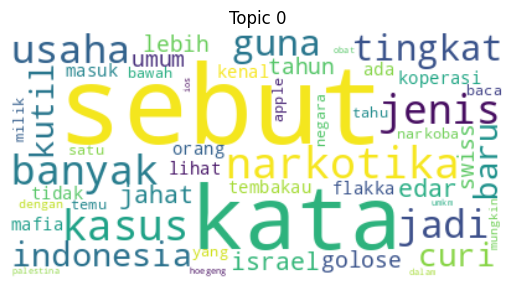

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


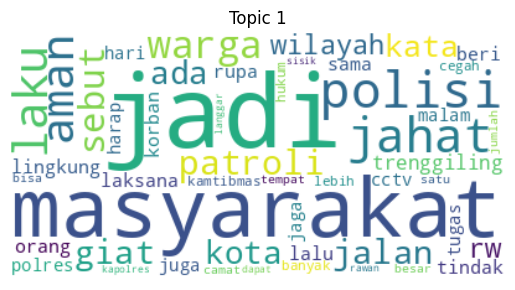

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


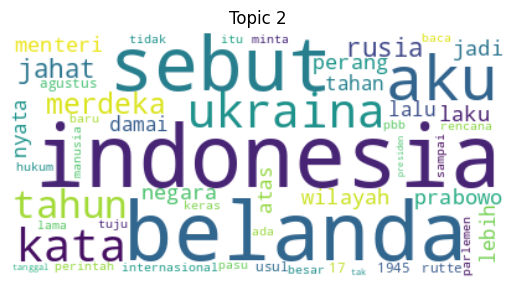

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


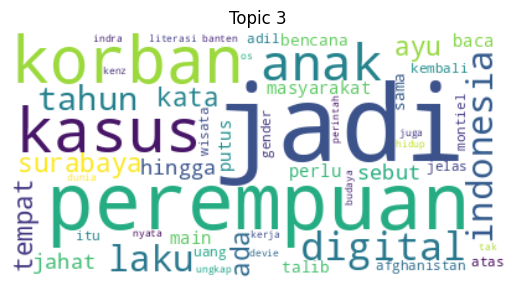

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


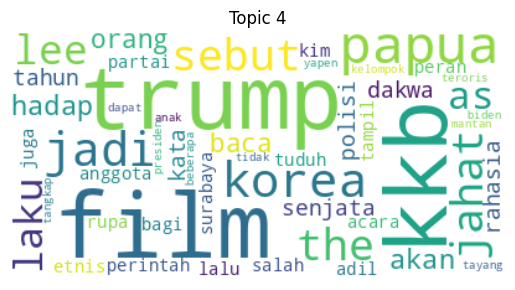

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


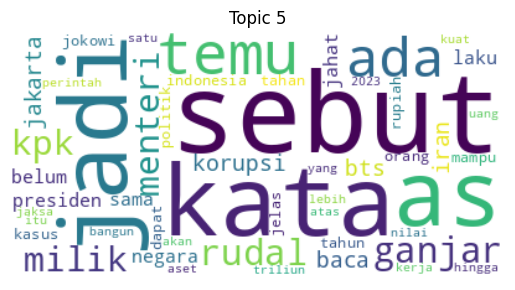

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


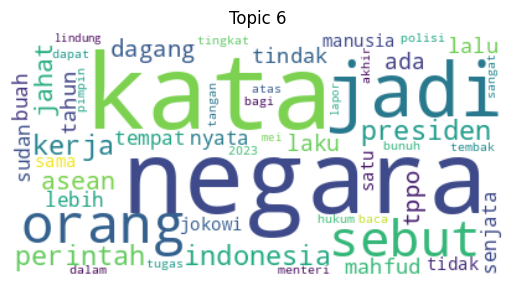

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


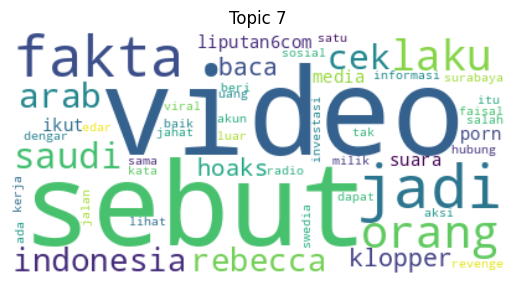

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


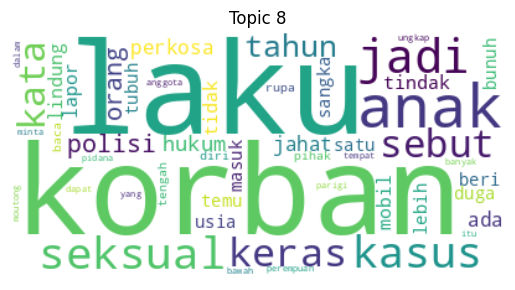

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


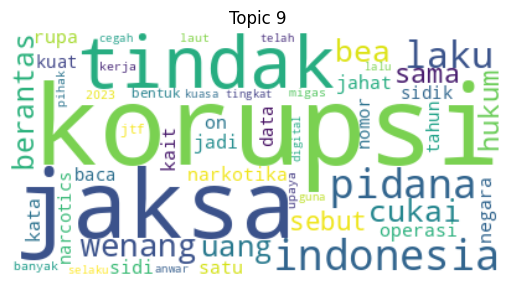

In [ ]:
def create_wordcloud(model: models.LdaModel, topic: int):
    text = {word: value for word, value in model.show_topic(topic, topn=50)}
    wc = WordCloud(
        background_color="white",
        max_words=100
    )
    wc.generate_from_frequencies(text)
    plt.clf()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

for i in range (0,10):
    create_wordcloud(lda, topic=i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


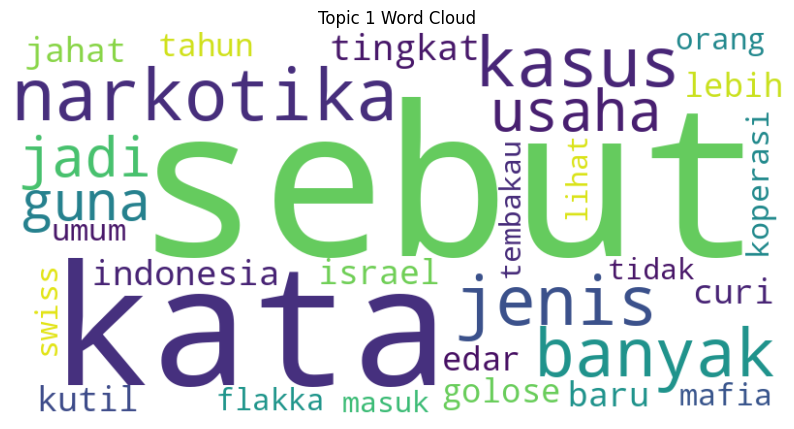

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


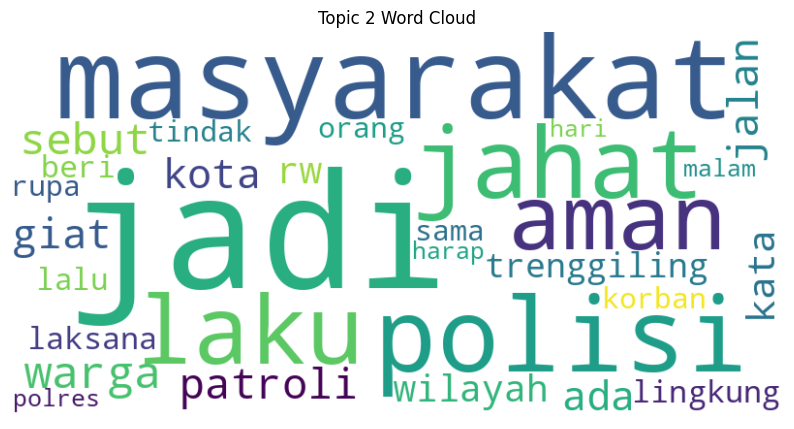

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


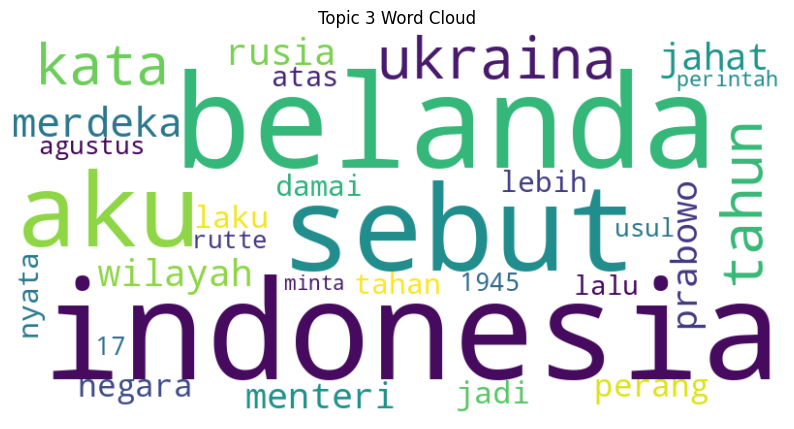

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


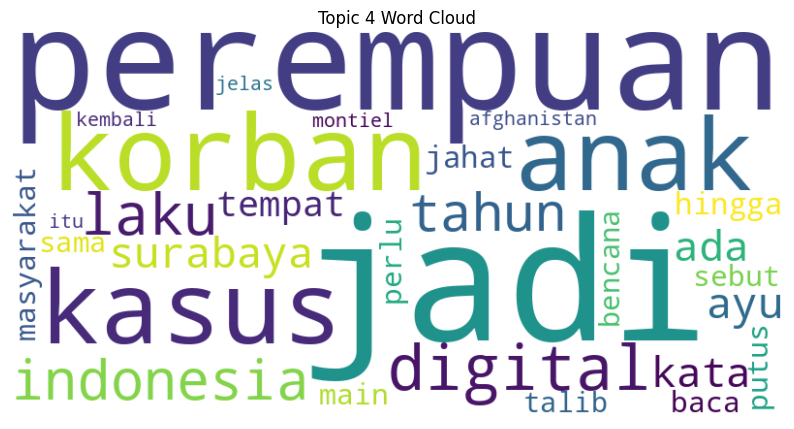

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


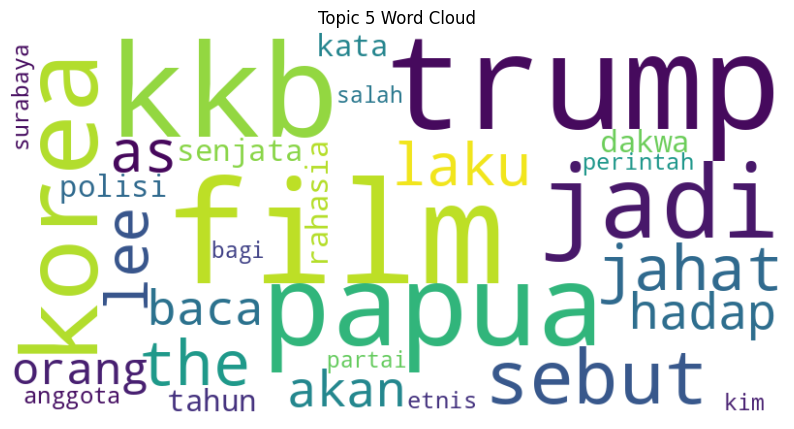

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


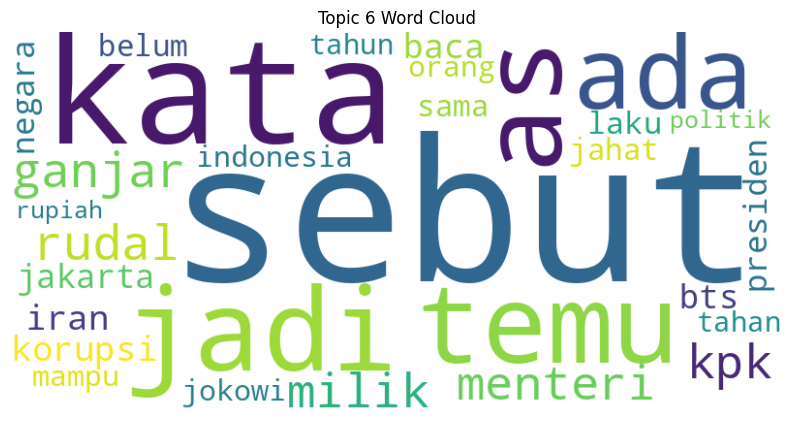

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


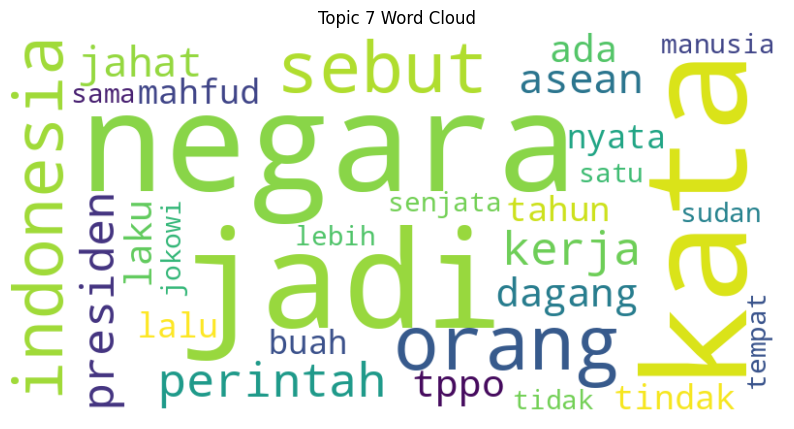

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


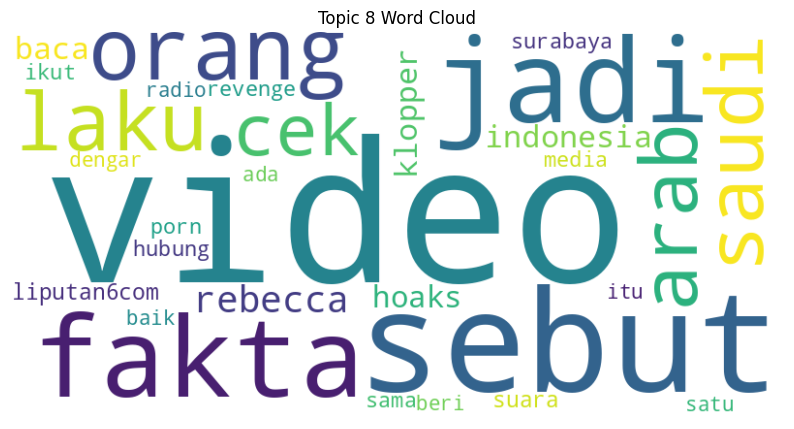

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


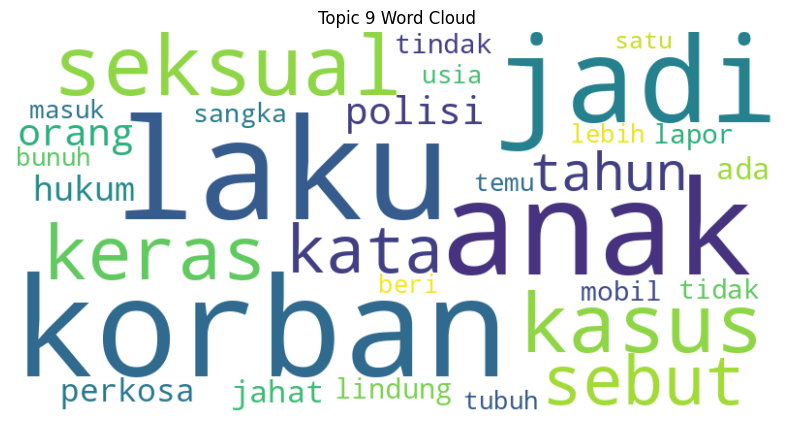

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


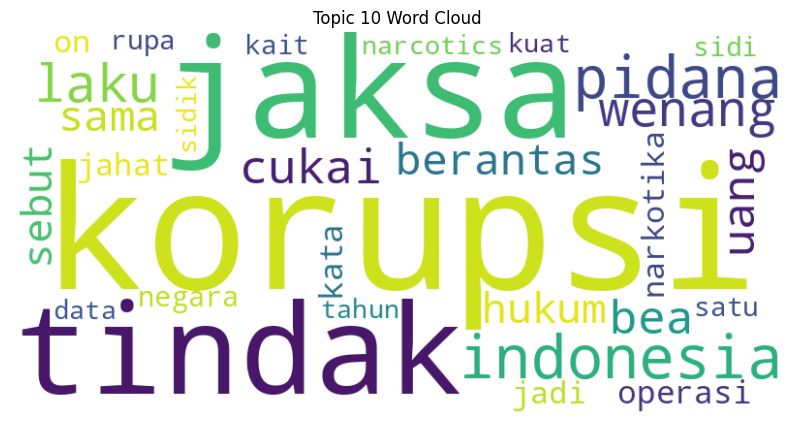

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


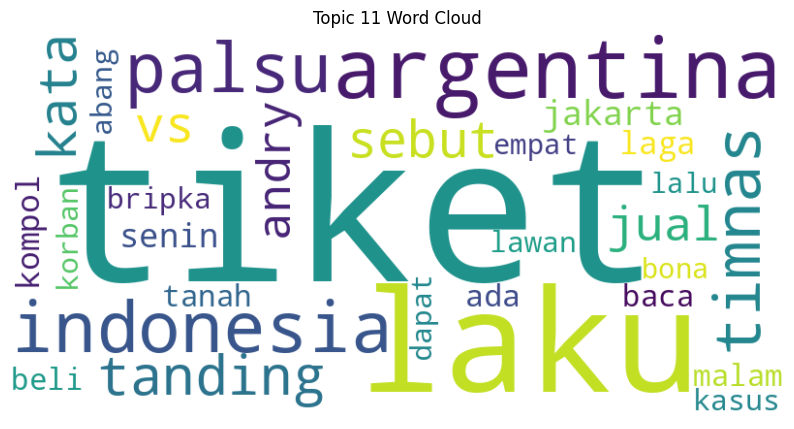

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


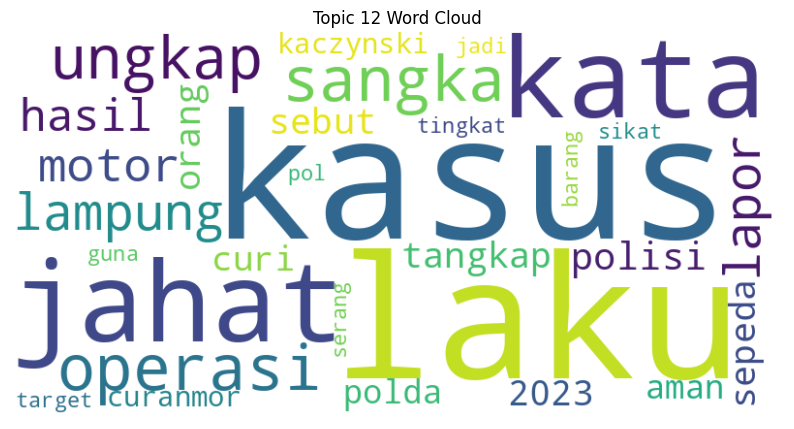

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


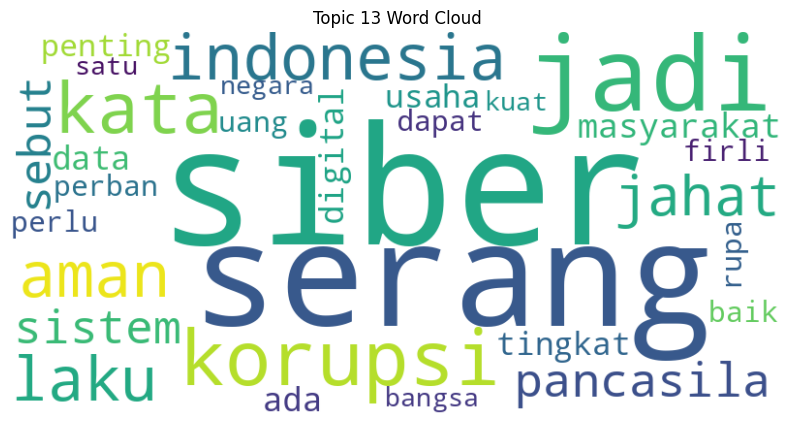

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


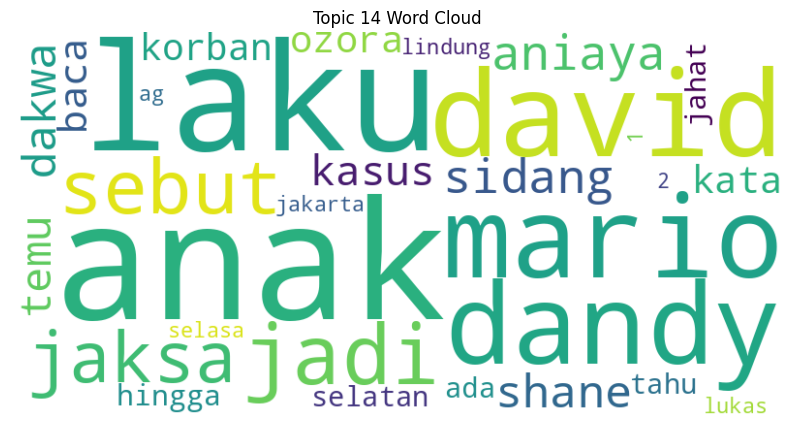

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


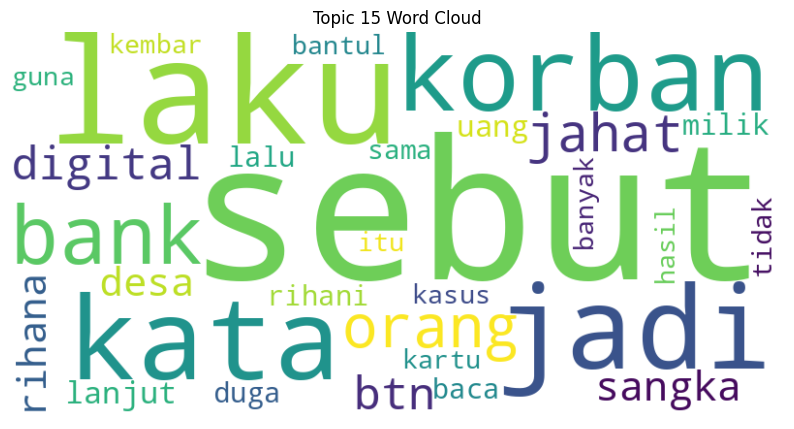

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


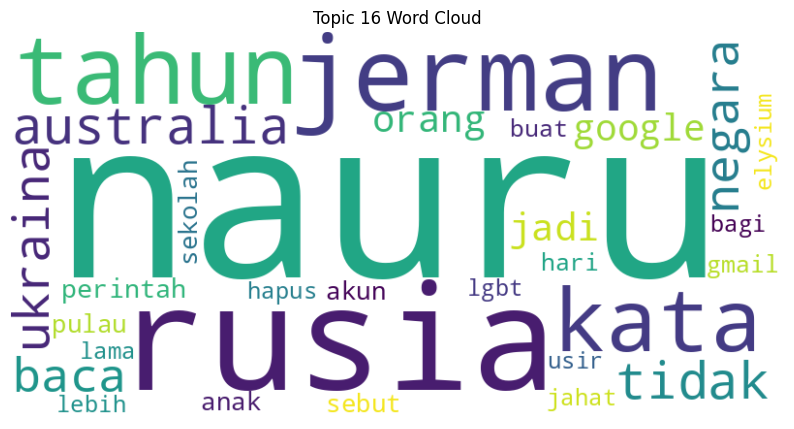

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


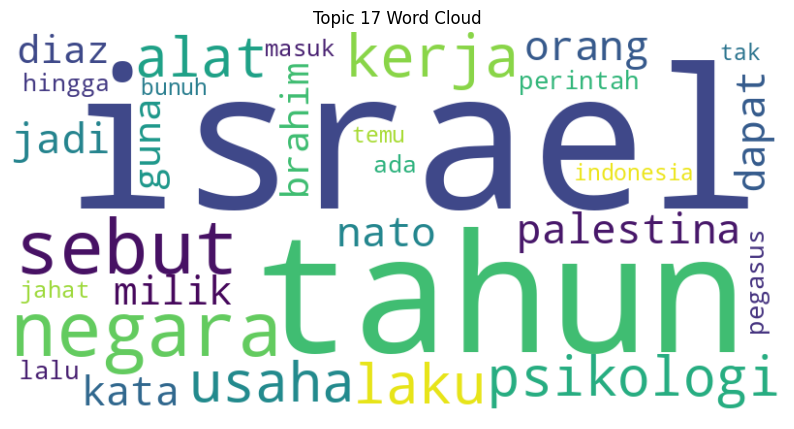

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


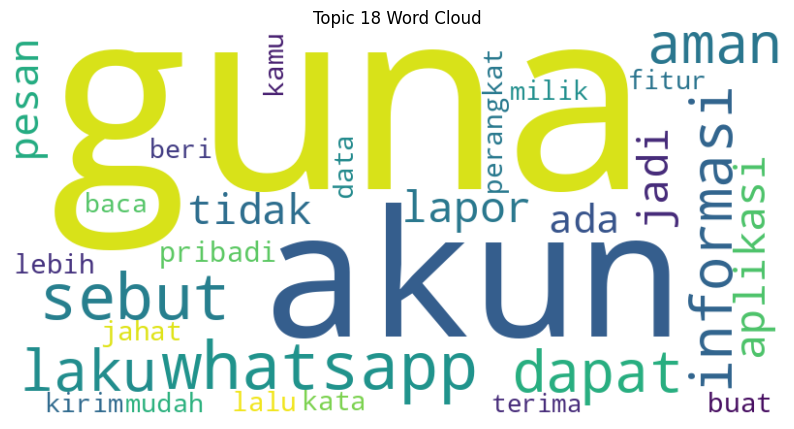

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


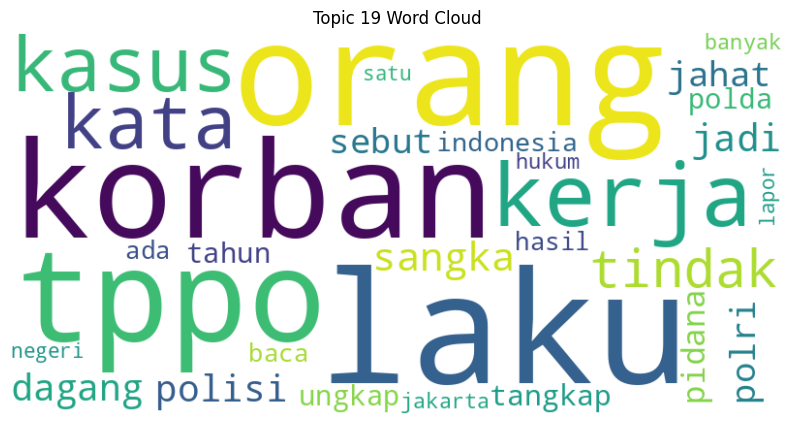

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


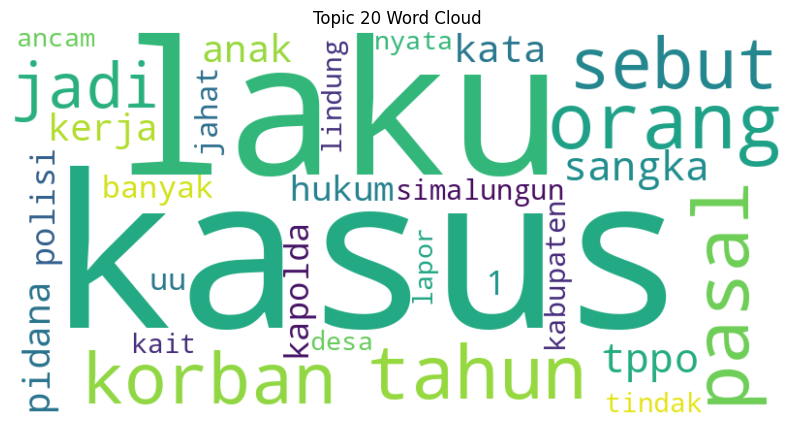

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


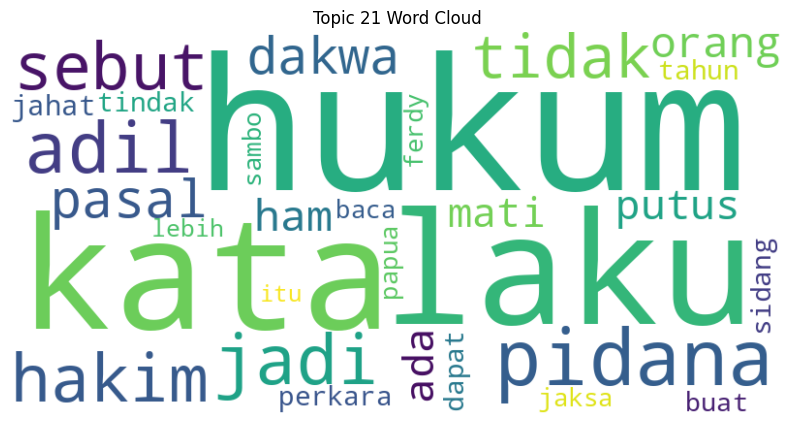

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


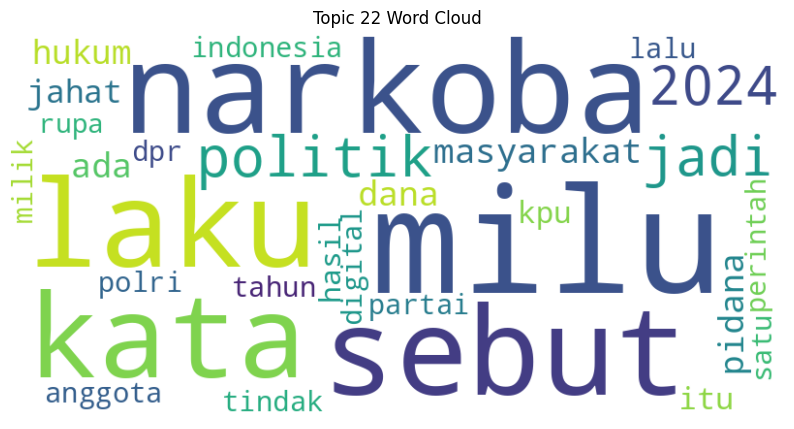

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


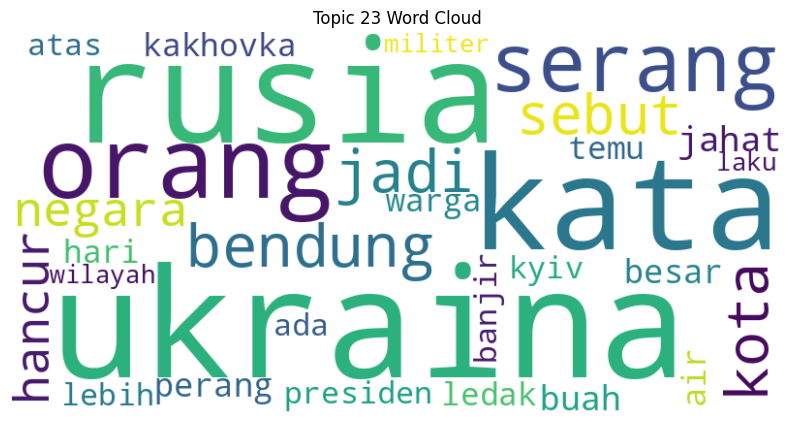

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


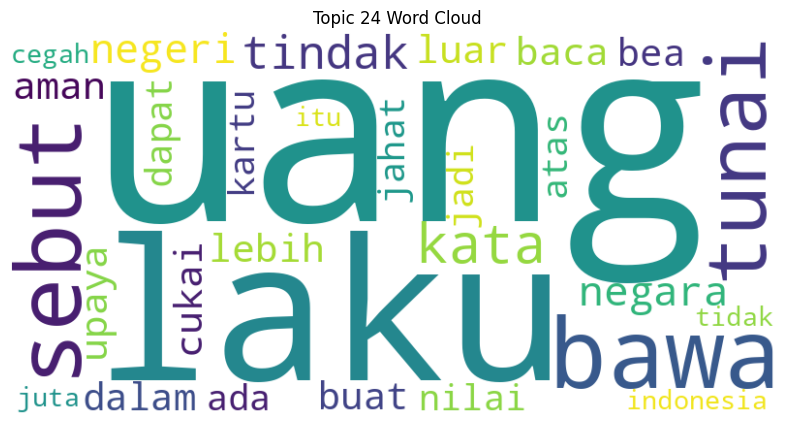

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


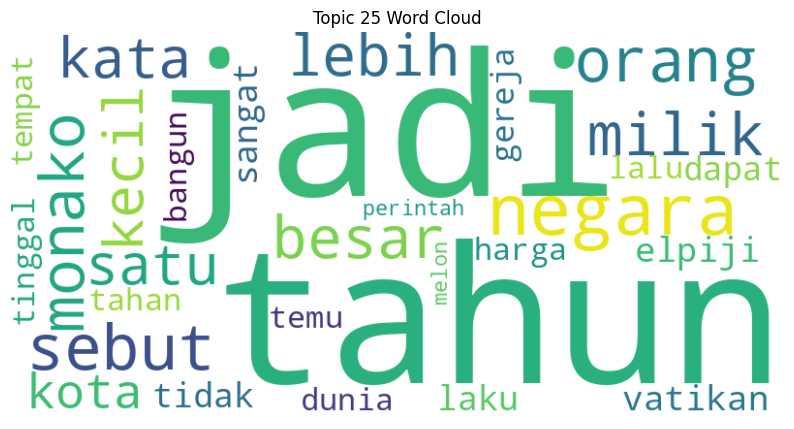

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


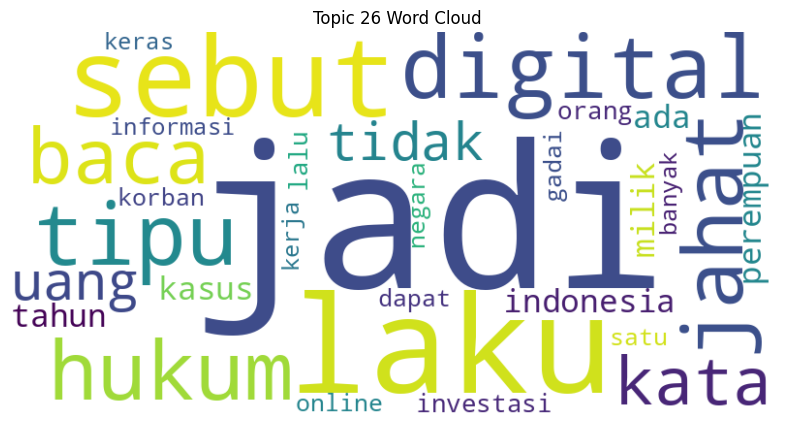

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


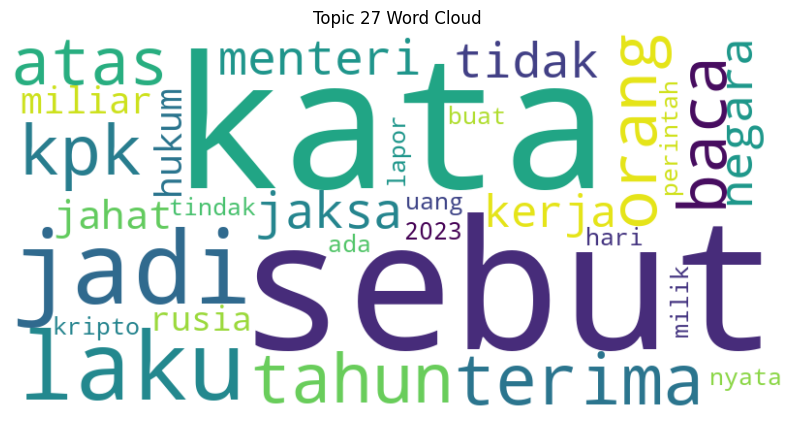

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


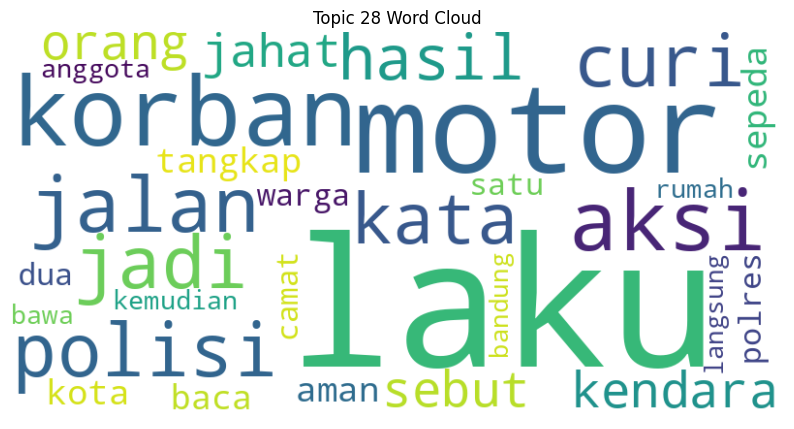

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


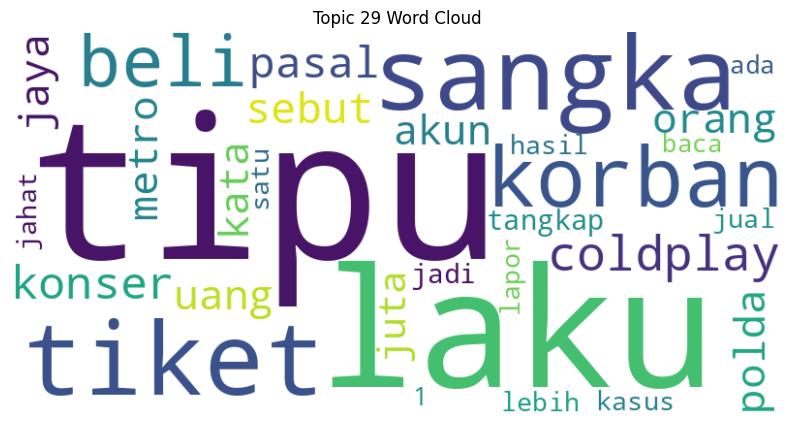

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


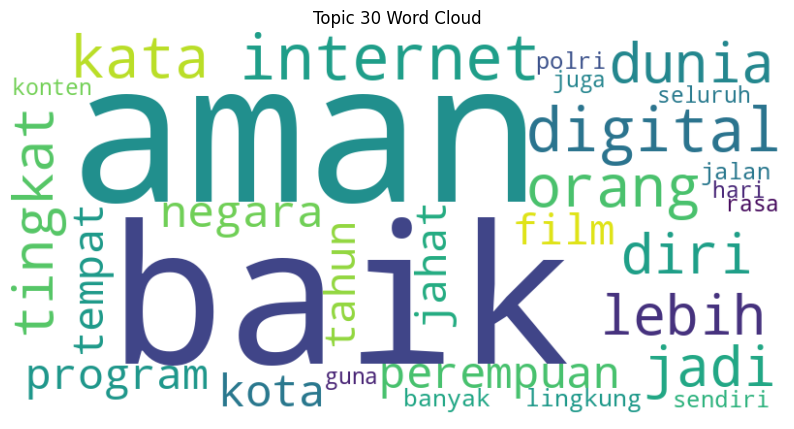

In [ ]:
# Iterate over each topic
for topic_id in range(lda.num_topics):
    # Get the top words and their probabilities for the current topic
    topic_words = lda.show_topic(topic_id, topn=30)
    topic_words_dict = {word: prob for word, prob in topic_words}

    # Create a word cloud for the topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id + 1} Word Cloud')
    plt.show()


LSA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


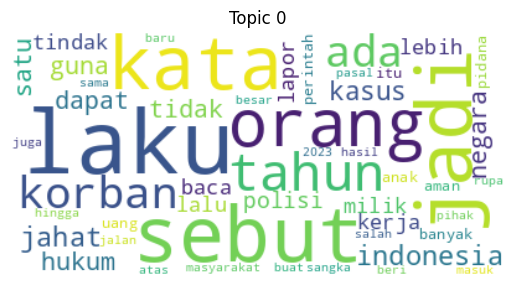

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


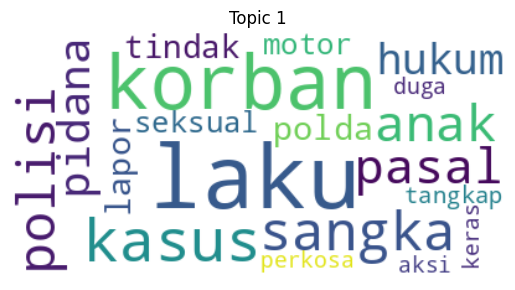

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


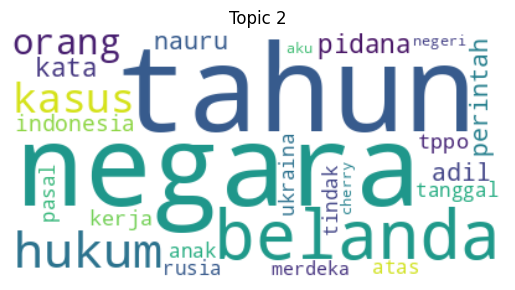

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


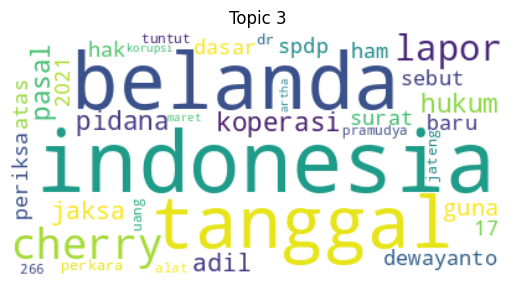

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


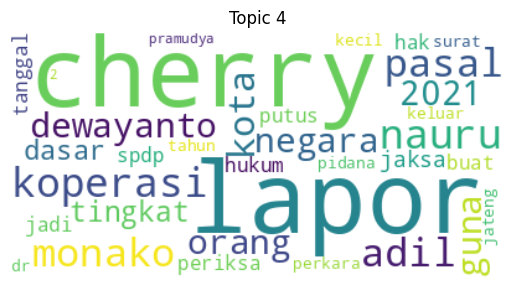

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


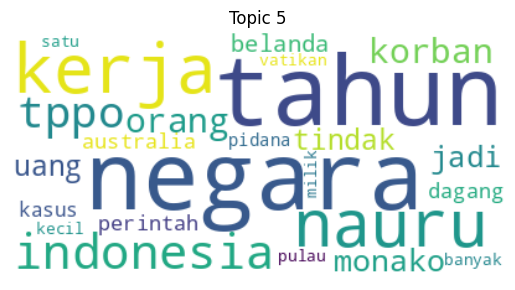

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


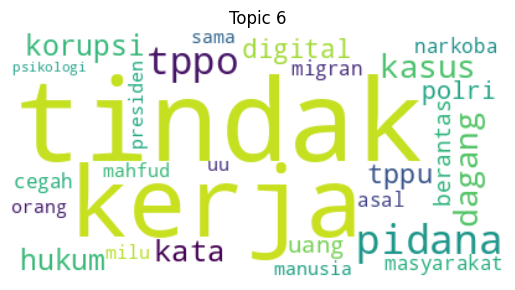

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


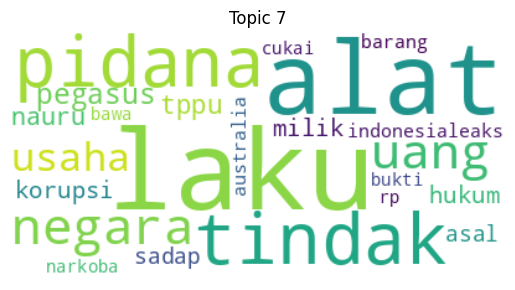

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


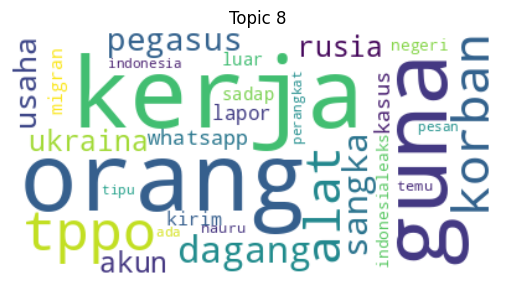

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


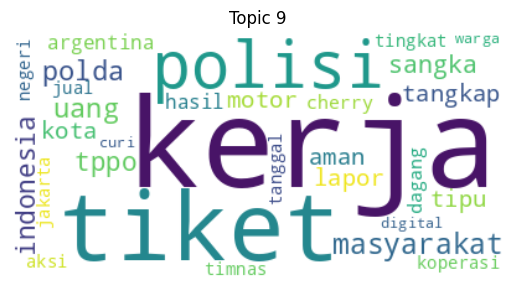

In [ ]:
def create_wordcloud(model: models.LsiModel, topic: int):
    text = {word: value for word, value in model.show_topic(topic, topn=50)}
    wc = WordCloud(
        background_color="white",
        max_words=100
    )
    wc.generate_from_frequencies(text)
    plt.clf()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

for i in range (0,10):
    create_wordcloud(lsa, topic=i)

## Experiments model

In [ ]:
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary

# preprocess the new document
new_doc = """Kebakaran hutan dan lahan sudah menyebar berbagai kabupaten dan kota di Riau. Berdasarkan rekapitulasi karhutla dari Kepala Pelaksana Badan Penanggulangan Bencana Daerah (BPBD) Riau, M Edy Afrizal, luasan melebihi 1.000 hektar.
Sebaran karhutla cukup cepat. Minggu terakhir Maret lalu, ketika Gubernur Syamsuar menetapkan status siaga darurat karhutla, luas baru 168,66 hektar. Kini, setengah dari 12 kabupaten dan kota di Riau menetapkan status siaga darurat.
Setelah Bengkalis dan Kepulauan Meranti—yang jadi acuan Pemerintah Riau menetapkan status siaga darurat karhutla—menyusul Pelalawan, Siak, Kampar, Indragiri Hilir dan Rokan Hulu.
Kabupaten Rokan Hilir termasuk wilayah dengan kebakaran cukup luas namun belum menetapkan status siaga darurat seperti kabupaten lain.Hari Dharma Putra, Kepala Pelaksana BPBD Rokan Hilir, mengatakan, status siaga darurat karhutla yang ditetapkan provinsi sudah cukup karena berlaku untuk seluruh wilayah.
Minggu lalu, Edy Afrizal mengirim Tim Satuan Reaksi Cepat Penanggulangan Bencana (SRC-PB) di Rokan Hilir dengan dilengkapi berbagai peralatan pemadam kebakaran. Saat ini, katanya, tim masih berjibaku memadamkan api baik lewat darat maupun bom air dari udara.
“Muncul titik api baru, setelah titik api sebelumnya dipadamkan,” kata Edy, dihubungi, 19 Juli lalu. Saat bersamaan, tim juga sempat memadamkan api di Kota Dumai, tetapi sudah selesai teratasi.
Kebakaran di Rokan Hilir terjadi beberapa hari sebelum tim terjun membantu Satgas Karhutla di daerah. BNPB sempat merilis kejadian pada 10 Juli. Luas kebakaran 27 hektar tersebar di empat kecamatan, Sinaboi, Rimba Melintang, Kubu dan Pasir Limau Kapas.
Asap karhutla di Pasir Limau Kapas, tepatnya di Kepenghuluan Panipahan Laut, salah satu titik kebakaran yang diumumkan BNPB sempat menyelimuti kepenghuluan sebelahnya, Panipahan Darat
Selama beberapa hari, sore jelang malam hingga pagi, bau asap tipis menyengat di hidung. Bahkan, kadang tercium di dalam ruma
“Semalam sudah berhasil kami padamkan titik kebakaran terakhir. Kami masih berjaga-jaga bersama Babinsa dan Bhabinkamtibmas,” kata Penghulu Panipahan Laut, Mustari, 20 Juli lalu.
Kebakaran, katanya, di lahan masyarakat, Jalan Telaga Suka dan Mujahidin. Tahun ini, sudah dua kali kebakaran lahan. Belum ada hujan di wilayah itu.
Saat ini, kebakaran di Rokan Hilir juga meluas di Kecamatan Bangko, tepatnya di Kepenghuluan Labuhan Tangga Besar dan Labuhan Tangga Hilir. Areal terbakar berupa semak dan sebagian sawit di gambut dalam. Tim pemadam kesulitan mencari sumber air, diperparah cuaca panas dan angin kencang.
“Permasalahan karhutla ini tak jauh-jauh dari pembukaan lahan. Kalau ini bencana, oke. Tapi kalau disengaja, terus ditanam sawit, sakit rasanya,” kata Hari Dharma Putra, saat dihubungi, 20 Juli.
Hari mendesak penegakan hukum.
Luas kebakaran di Rokan Hililebih 100 hektar. Dalam waktu dekat, Musabaqah Tilawatil Quran (MTQ) ke 40 tingkat provinsi akan diselenggarakan di Bagansiapiapi, pusat pemerintahan kabupaten itu.
Wakil Bupati Sulaiman, mengatakan tim Satgas bergerak terus tiap hari memadamkan api. “Saya ingin pokoknya selesaikan karhutla. Pak Bupati dalam tiap rapat juga minta karhutla harus bisa teratasi jelang pelaksanaan MTQ.”
Tim dari Pekanbaru dan Dumai bahkan Satuan Polisi Pamong Praja turut membantu pemadaman. Titik api hilang timbul. Cuaca cukup panas. Tak ada hujan dan kering. “Pening nih. Selain hutan, air pun tak ada lagi. Dapat laporan dari anggota kebakaran juga terjadi di lahan perusahaan. Tapi kita belum pastikan,” kata Sulaiman.Berdasarkan prakiraan cuaca dan hotspot yang saban hari dirilis Badan Meteorologi, Klimatologi dan Geofisika (BMKG) Pekanbaru, Rokan Hilir sangat minim potensi hujan dalam beberapa minggu terakhir. Akibatnya titik panas pun paling banyak bermunculan di wilayah itu.
Marzuki, Koordinator Bidang Data dan Informasi BMKG Pekanbaru, mengatakan, saat ini seluruh wilayah Riau memasuki musim kemarau. Tingkat kekeringan di Rokan Hilir, sebelumnya juga terjadi di wilayah lain. Secara bergantian dan berpindah-pindah dari Rokan Hulu ke Kampar terlebih dahulu.
“Kontribusi dan distribusi curah hujan tidak sama. Sifatnya juga tidak merata. Memang akan terjadi pengurangan curah hujan. Prediksi kami, memang wilayah Riau puncak musim kering bergantian,” katanya via telepon, 20 Juli.
Kondisi itu sejalan dengan informasi iklim dasarian II Juli 2022 di Riau yang dirilis Kepala Stasiun Klimatologi Kampar, Ayi Sudrajat, yang diterima Mongabay melalui WhatApps Grup, hari yang sama.
Berdasarkan peta monitoring hari tanpa hujan, Rokan Hilir masuk kategori menengah dan panjang yang berlangsung 11 sampai 20 hari. Curah hujan juga tergolong rendah antara 0-50 milimeter.
Tahun ini, BMKG Pekanbaru perkirakan musim hujan dan kemarau di wiilayah Riau kategori normal. Saat musim kemarau tahun ini tak terlalu kering karena fenomena la-nina lemah.
Walau musim kemarau, Riau masih berpotensi hujan ringan sampai sedang. Tipe iklim itu karena dipengaruhi letak wilayah Riau pada garis ekuatorial.
BMKG Pekanbaru memprediksi kemarau sejak Mei lalu. Puncaknya Juni dan Juli. Agustus, masih kategori kemarau. September, peralihan menuju musim penghujan. Oktober, sebagian besar wilayah Riau sudah masuk musim penghujan, tetapi masih ada wilayah dalam masa transisi kemarau ke penghujan.
“Terjadi transisi secara bertahap mulai September sampai Oktober. Terutama disebagian wilayah Indragiri Hulu dan Indragiri Hilir. Mungkin akhir Oktober baru masuk musim penghujan,” kata Marzuki.
Untuk antisipasi karhutla, BMKG Pekanbaru terus beri informasi kondisi cuaca harian berikut analisis curah hujan dan hari tanpa hujan tiap-tiap daerah.
Marzuki bilang, dinamika atmosfir selalu berubah-ubah karena itu mereka terus memantau.
Tim Satgas juga terus mengendalikan karhutla. Edy mengatakan, juga dilakukan teknologi modifikasi cuaca (TMC) untuk mencegah kebakaran meluas. Wilayah dengan potensi awan yang menghasilkan curah hujan akan semai dengan garam.
Saat ini, dua heli water boombing dan 1satu patroli dari Kementerian Lingkungan Hidup dan Kehutanan (KLHK) dan BNPB, terus mengudara."""
new_doc_tokens = simple_preprocess(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc_tokens)

# infer the topic distribution for the new document
new_doc_topics = lda.get_document_topics(new_doc_bow)
print(new_doc_topics)


[(0, 0.10414244), (2, 0.415039), (3, 0.3395613), (8, 0.01187427), (9, 0.1284548)]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
